#**Третья лабораторная работа**#

Вариант 22

Выполнил:

Суханкулиев Мухаммет,
студент группы N3246

поток Мат Стат 28.3

**Задача**

С помощью критерия Пирсона (хи-квадрат), проверить гипотезу, что случайная выборка, имеет экспоненциальное распределение с параметром $\lambda = 2.45$. Взять равномерную сетку из $10$ интервалов и уровень значимости $\varepsilon = 0.05$.

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from google.colab import drive
import requests
import json

Исходные данные из файла
https://drive.google.com/file/d/115T4xGoaKULljZuSLcgLVAIMo-ke-Bw_/

(Вариант 22)

In [156]:
# Монтируем диск и загружаем данные
drive.mount('/content/drive')
file_id = '115T4xGoaKULljZuSLcgLVAIMo-ke-Bw_'
url = f'https://drive.google.com/uc?id={file_id}'
response = requests.get(url)
data = json.loads(response.content)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
x = np.array(data["x"])
lambda_ = float(data["lambda"])
epsilon = 0.05

print(f"Выборка:\n{x}")
print(f"Параметр λ = {lambda_}")
print(f"Уровень значимости ε = {epsilon}")

# Параметры
n = len(x)
k = 10
print(f"Число интервалов = {k}")
print(f"Объём выборки n = {n}")

Выборка:
[0.38 0.6  0.28 0.49 0.09 0.68 0.36 0.62 0.32 0.37 0.04 0.01 0.24 0.01
 0.19 0.17 0.03 0.54 0.11 0.   0.02 0.74 0.06 1.42 0.22 0.24 0.04 0.52
 0.02 0.04 0.39 0.79 1.01 0.13 0.58 0.04 0.04 0.63 0.05 0.15 0.49 0.79
 0.27 0.64 0.06 0.98 1.65 0.02 0.01 0.02 0.08 0.76 1.02 0.6  0.33 0.04
 0.13 1.29 1.79 1.62 0.37 0.03 1.66 0.4  0.23 0.01 0.13 0.05 0.2  0.28
 0.35 0.69 0.18 0.33 0.57 1.77 0.46 0.82 0.49 0.18 0.27 0.14 0.53 0.06
 1.18 1.34 0.69 0.18 0.83 0.38 0.36 0.12 0.2  0.07 0.05 0.69 0.47 0.19
 0.19 1.51]
Параметр λ = 2.45
Уровень значимости ε = 0.05
Число интервалов = 10
Объём выборки n = 100


Гипотеза $H_1$: $X \sim Exp(\lambda=2.45) -$ выборка имеет экспонинцеальное распределение с параметром $\lambda=2.45$.

Альтернативная гипотеза: $H_2$: $X \not\sim Exp(\lambda=2.45)  -$ выборка НЕ имеет экспонинцеальное распределение с параметром $\lambda=2.45$.

Удорядочим исходную выборку в вариационный ряд. Получим два значения $a$ и $b$, которые будут использоваться для построения интервалов.

In [158]:
x_sorted = np.sort(x)
a = x_sorted[0]
b = x_sorted[-1]
print(f"Минимум a = {a}")
print(f"Максимум b = {b}")

Минимум a = 0.0
Максимум b = 1.79


Делаем разбиение на $k=10$ равномерных интервалов.
Границы интервалов:
$$i_k=i+(k-1)\cdot 𝛥, $$ где $𝛥=\frac{b-a}{10}$

Для каждого интервала $[x_k, x_{k+1})$, подсчитываем количество наблюдений $n_k$, попавших в него.

In [159]:
intervals = np.linspace(a, b, k + 1)
print(f"Границы интервалов:\n{intervals}")

n_k = np.histogram(x, bins=intervals)[0]
print(f"Частоты по интервалам:\n{n_k}")

Границы интервалов:
[0.    0.179 0.358 0.537 0.716 0.895 1.074 1.253 1.432 1.611 1.79 ]
Частоты по интервалам:
[34 20 15 12  6  3  1  3  1  5]


Пусть $F(x)-$ функция распределения для экспонинцеального распределения с параметром $\lambda=2.45$. Тогда теоретическая вероятность попадания случайной величины в $k$-й интервал (между $x_k$ и $x_{k+1}$) вычисляется через:
$$p_k=\int_{x_{k}}^{x_{k+1}}{\lambda e^{-\lambda x}dx}=F(x_{k+1})-F(x_k)=e^{-\lambda x_k}-e^{-\lambda x_{k+1}}$$
где $F(x)-$ это функция распределения для экспонинцеального распределения:
$$F(x)=1-e^{-\lambda x}$$
Таким образом найдем теоретическую вероятность $p_k$ для каждого интервала $[x_k, x_{k+1}]$.

In [160]:
p_k = [np.exp(-lambda_ * bins[i]) - np.exp(-lambda_ * bins[i + 1]) for i in range(k)]

p_k = np.diff(st.expon.cdf(intervals, scale=1/lambda_))
print(f"Теоретические вероятности p_k:\n{p_k}")

Теоретические вероятности p_k:
[0.35502905 0.22898342 0.14768766 0.09525425 0.06143622 0.03962458
 0.0255567  0.01648333 0.01063127 0.00685686]


In [161]:
print(f"Сумма вероятностей: {np.sum(p_k):.6f}")
p_k[-1] = 1 - np.sum(p_k[:-1])
print(f"Сумма вероятностей: {np.sum(p_k)}")

Сумма вероятностей: 0.987543
Сумма вероятностей: 1.0


Теперь вычислим статистику с использованием формулы:
$$\rho(x)=\sum_{k=1}^{n}\frac{(n_k-np_k)^2}{np_k}$$
где:

$n_k-$ количество элементиов выборки, попавших в $k$-й интервал,

$n-$ общий объем выборки,

$p_k-$ вероятность попадания случайной величины в $k$-й интервал, вычисляемая через теоретическую функцию распределения.


In [162]:
expected = n * p_k
rho = np.sum((n_k - expected) ** 2 / expected)
print(f"Значение статистики Пирсона: ρ(x) = {rho:.4f}")

Значение статистики Пирсона: ρ(x) = 8.2488


Степени свободы для $\chi^2$ распределения вычисляются по формуле:
$$df=k-1$$

Для уровня значимости $\varepsilon=0.05$ найдем критическое значение $C$ для распределения $\chi^2$ с 9 степенями свободы (по таблице https://www.matematicus.ru/teoriya-veroyatnosti/tablitsy/tablitsa-pirsona).
$$C\approx 16.9$$
(или `chi2.ppf` из `scipy.stats`)

In [163]:
chi_critical = st.chi2.ppf(1 - epsilon, df=k - 1)
print(f"Критическое значение (квантиль) χ² = {chi_critical:.4f}")

Критическое значение (квантиль) χ² = 16.9190


Если $\rho(x)<C$, то принимаем гипотезу $H_1$, т.е. данные соответствуют экспоненциальному распределению с параметром $\lambda=2.45$.

Если $\rho(x)>C$, то отвергаем гипотезу $H_1$ и принимаем $H_2$, т.е. данные НЕ соответствуют экспоненциальному распределению с параметром $\lambda=2.45$.

In [164]:
if rho < chi_critical:
    print("Гипотеза принимается: распределение соответствует экспоненциальному с λ = 2.45.")
else:
    print("Гипотеза отвергается: распределение не соответствует экспоненциальному с λ = 2.45.")

Гипотеза принимается: распределение соответствует экспоненциальному с λ = 2.45.


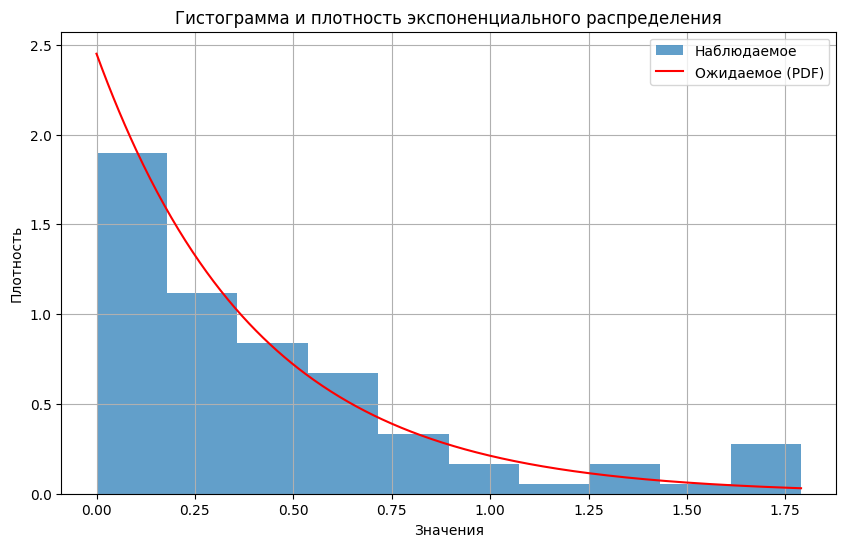

In [165]:
# Строим гистограмму наблюдаемых частот
plt.figure(figsize=(10, 6))
plt.hist(x, bins=intervals, alpha=0.7, label='Наблюдаемое', density=True)

# Строим теоретическую экспоненциальную плотность
x_vals = np.linspace(0, intervals[-1], 500)
pdf_vals = lambda_ * np.exp(-lambda_ * x_vals)  # плотность PDF

plt.plot(x_vals, pdf_vals, 'r-', label='Ожидаемое (PDF)')

plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма и плотность экспоненциального распределения')
plt.legend()
plt.grid(True)
plt.show()

#**Заключение**#

В ходе выполнения лабораторной работы выяснилось, что на уровне значимости ε = 0.05 по критерию Пирсона гипотеза о соответствии выборки экспоненциальному распределению с параметром λ = 2.45 не отвергается. Распределение данных согласуется с теоретической моделью.